In [1]:
%autosave 0
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
import shutil

from sklearn.metrics import mean_absolute_error, mean_squared_error

Autosave disabled


In [2]:
path = r'C:\Users\utilisateur\0-DataScience\Formation-P3\Covid-19\AzureSC\Rapport'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)
    os.unlink(filename)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,2020-03-29,France,37972.0,37575.0,2517.0,2314.0,397.0,203.0
1,2020-03-29,China,82472.0,82342.0,3304.0,3306.0,130.0,-2.0
2,2020-03-29,Italy,93505.0,92472.0,10092.0,10023.0,1033.0,69.0
3,2020-03-29,Spain,74605.0,72248.0,5565.0,5690.0,2357.0,-125.0
4,2020-03-29,United States,128133.0,124665.0,2201.0,2191.0,3468.0,10.0
...,...,...,...,...,...,...,...,...
1017,2020-07-17,United Kingdom,293180.0,292552.0,45228.0,45119.0,628.0,109.0
1018,2020-07-17,Germany,201032.0,200843.0,9093.0,9082.0,189.0,11.0
1019,2020-07-17,Iran,267962.0,267061.0,13572.0,13608.0,901.0,-36.0
1020,2020-07-17,Turkey,216890.0,216873.0,5438.0,5440.0,17.0,-2.0


In [3]:
def showMetricsGeneral(subject):
    print(f"-- Global performances for {subject} --")
    MAPE =mean_absolute_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict']) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict'], squared=False)
    print("RMSE = ",RMSE)

In [4]:
showMetricsGeneral("cases")

-- Global performances for cases --
MAPE =  2978.880626223092
RMSE =  7446.3050895917395


In [5]:
showMetricsGeneral("deaths")

-- Global performances for deaths --
MAPE =  295.3757338551859
RMSE =  689.0995812483943


In [6]:
def visFollow(country,subject):
    df = frame[frame['country'].isin([f"{country}"])]
    list_value_predict = df[f"total_{subject}_predict"]
    list_value_real = df[f"total_{subject}_real"]
    
    print(f"-- {country} performances for {subject} --")
    MAPE =mean_absolute_error(list_value_real,list_value_predict) 
    print("MAE = ",MAPE)
    RMSE = mean_squared_error(list_value_real,list_value_predict, squared=False)
    print("RMSE = ",RMSE)
    
    this_graf = plt.plot(df["date"], list_value_predict, 'go--', 
                         linewidth=2, markersize=12,label=f'{subject} predict')
    this_graf = plt.plot(df["date"], list_value_real, color='red',
                         marker='o',linewidth=2, markersize=12,label=f'{subject} real')
    this_graf =plt.title(f"{country}")
    plt.legend()
    plt.xticks(rotation=70)
    return this_graf

def visMetrics(country):
    vv = frame[frame['country'].isin([f"{country}"])]
    plt.plot(vv["error_abs_cases"],marker='o',label="error_abs_cases",color='blue',markersize=12)
    plt.plot(vv["error_abs_deaths"],marker='o',label="error_abs_deaths",color='orange',markersize=12)
    plt.title("Abs error over time")
    plt.legend()

def visShow(country):
    f0 = plt.figure(figsize=(20,10))
#     ax1 = plt.subplot(1,2,1)
    v = visFollow(f"{country}","cases")
    f1 = plt.figure(figsize=(20,10))
#     ax2 = f1.add_subplot(1,2,2)
    v = visFollow(f"{country}","deaths")
    f2 = plt.figure(figsize=(20,10))
#     ax3 = f2.add_subplot(1,2,1)
    v = visMetrics(country)

-- World performances for cases --
MAE =  15266.0
RMSE =  19997.052310050825
-- World performances for deaths --
MAE =  1532.8484848484848
RMSE =  1874.125881092788


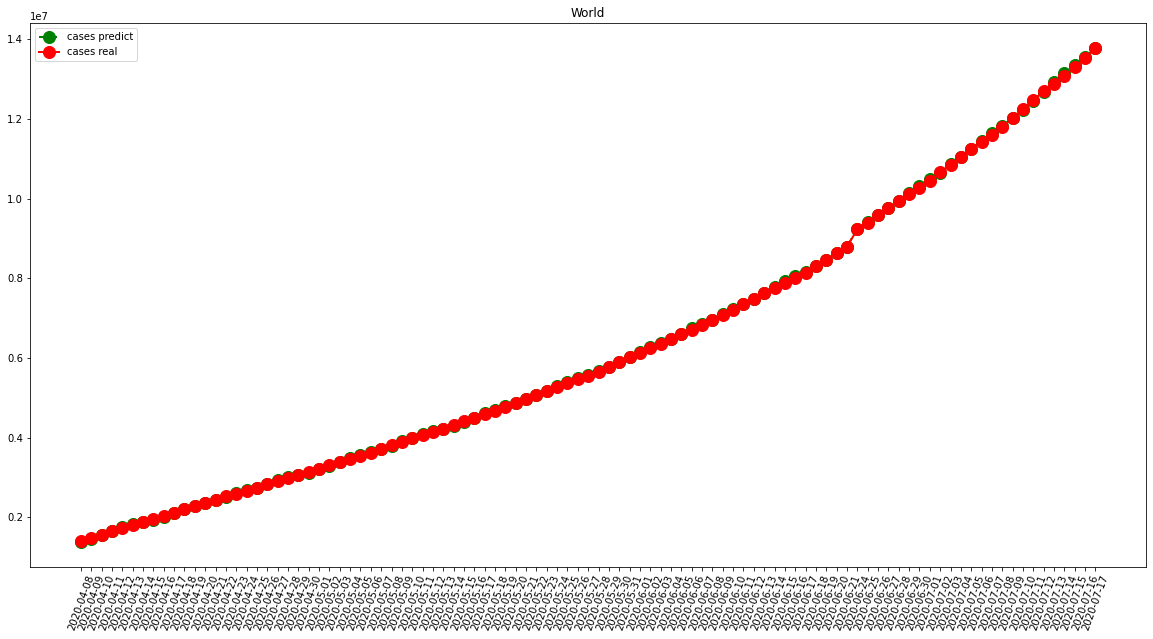

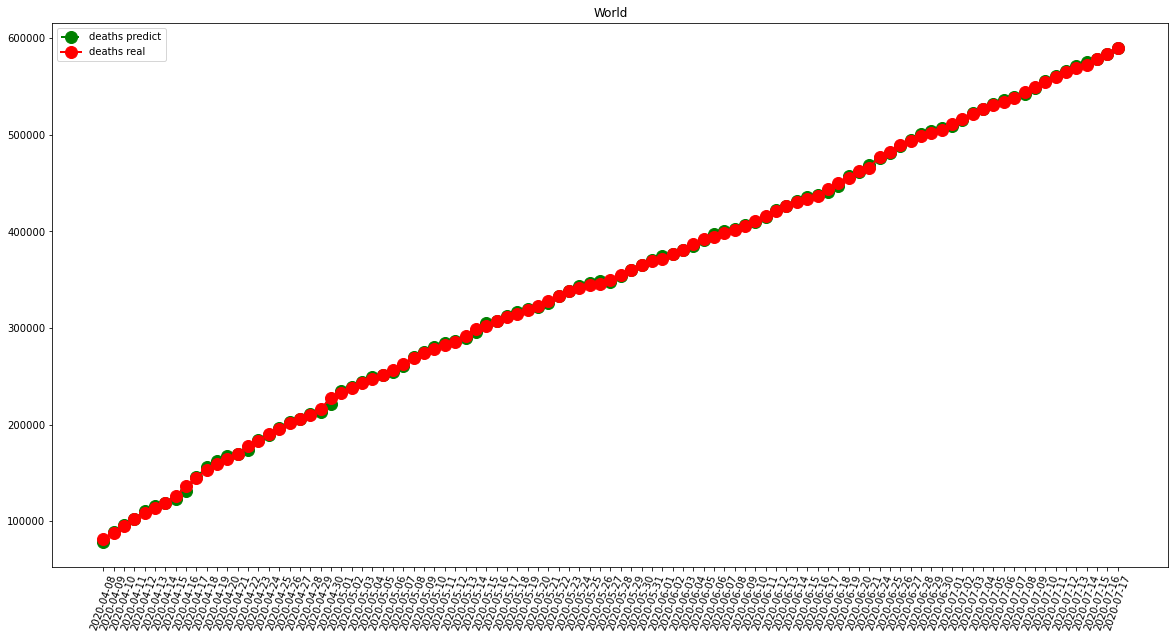

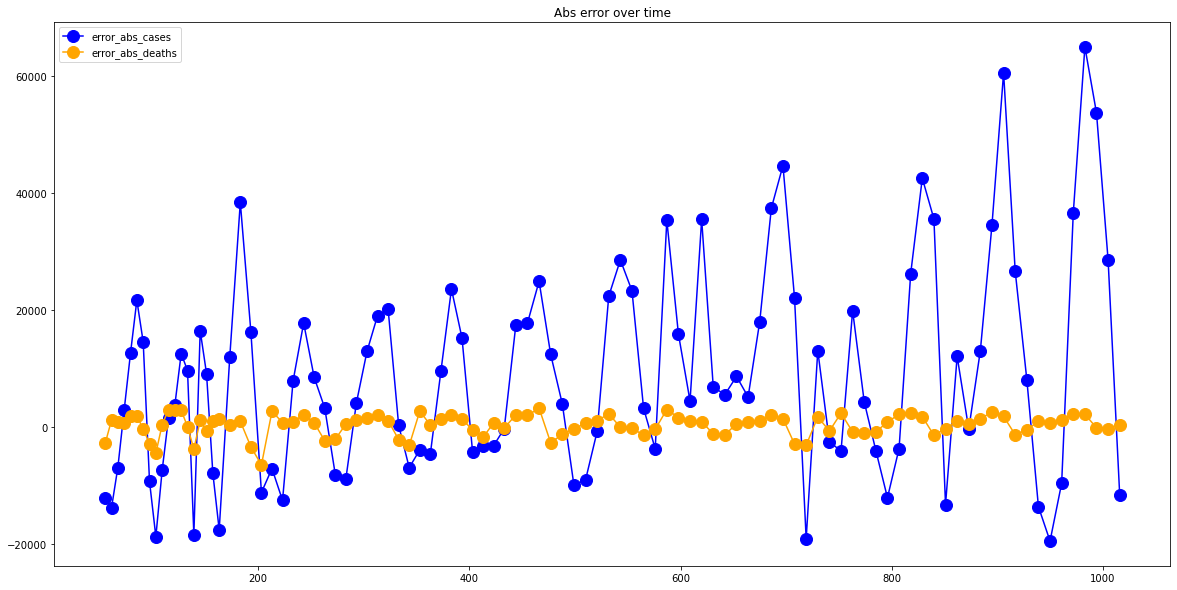

In [7]:
visShow("World")

-- France performances for cases --
MAE =  847.1467889908257
RMSE =  1399.8378313677767
-- France performances for deaths --
MAE =  163.41284403669724
RMSE =  320.9131752593618


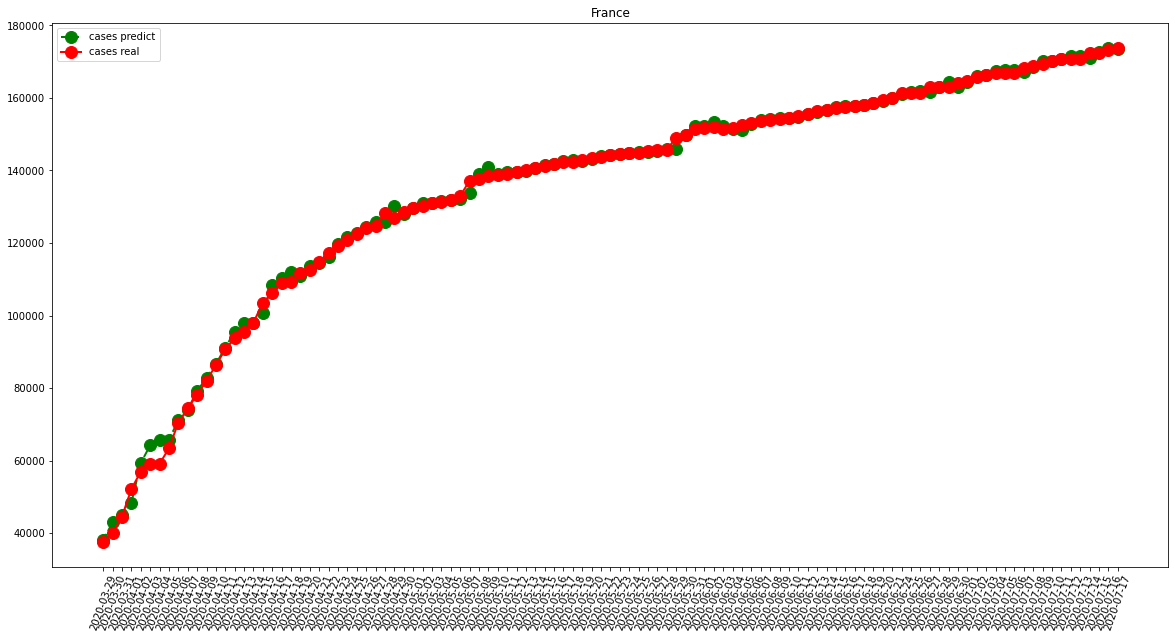

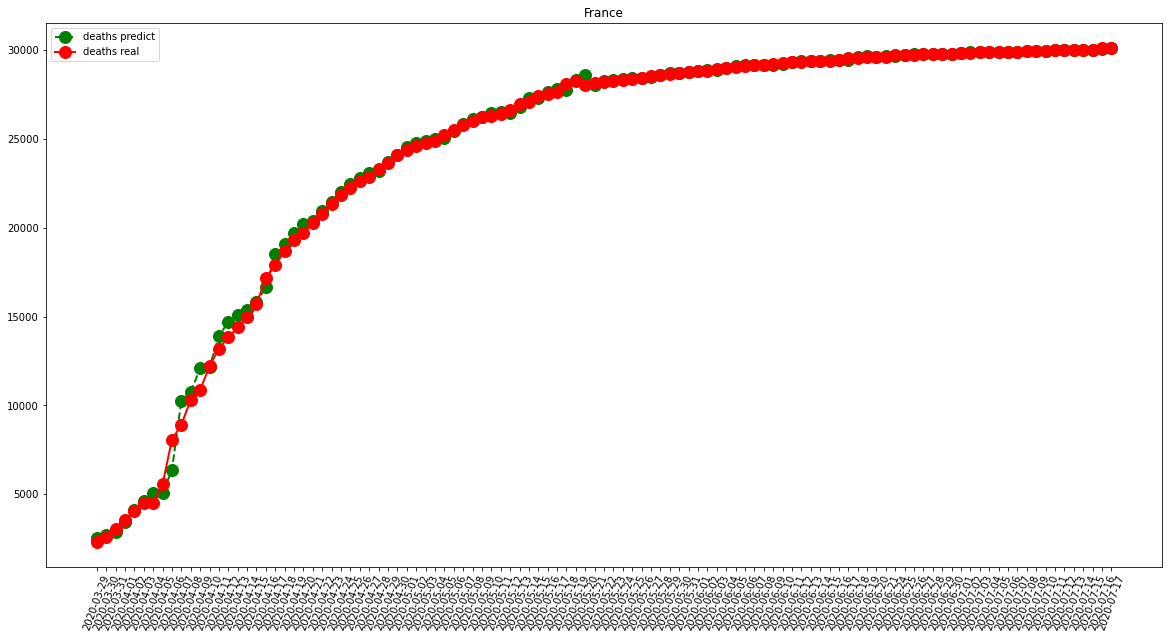

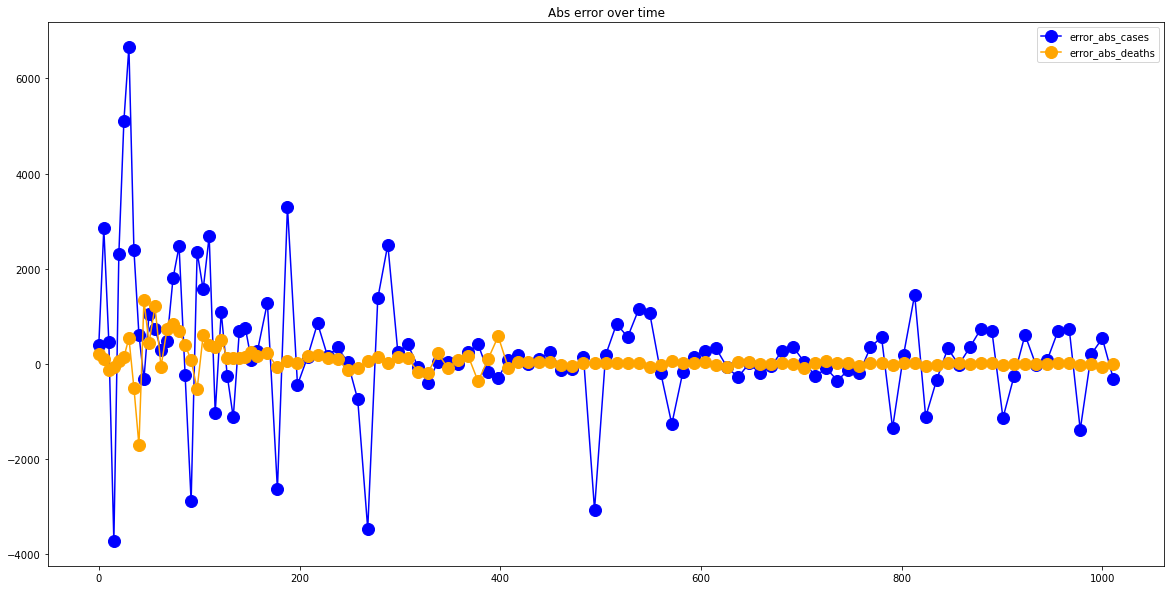

In [8]:
visShow("France")

-- Italy performances for cases --
MAE =  351.95412844036696
RMSE =  521.2220555508569
-- Italy performances for deaths --
MAE =  91.39449541284404
RMSE =  283.35020636932893


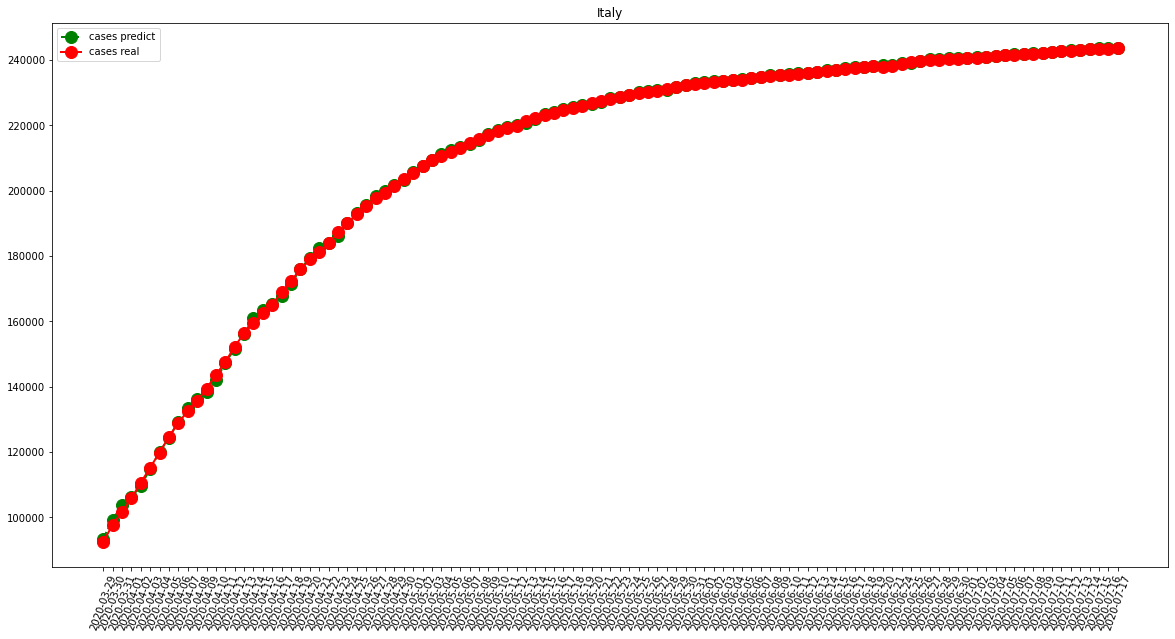

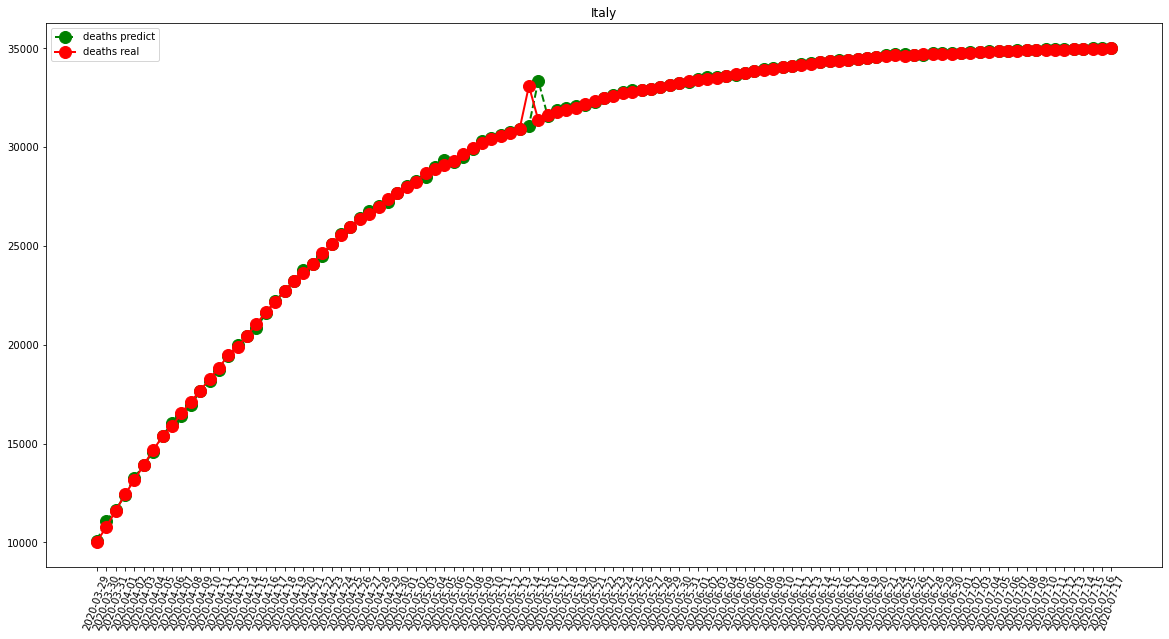

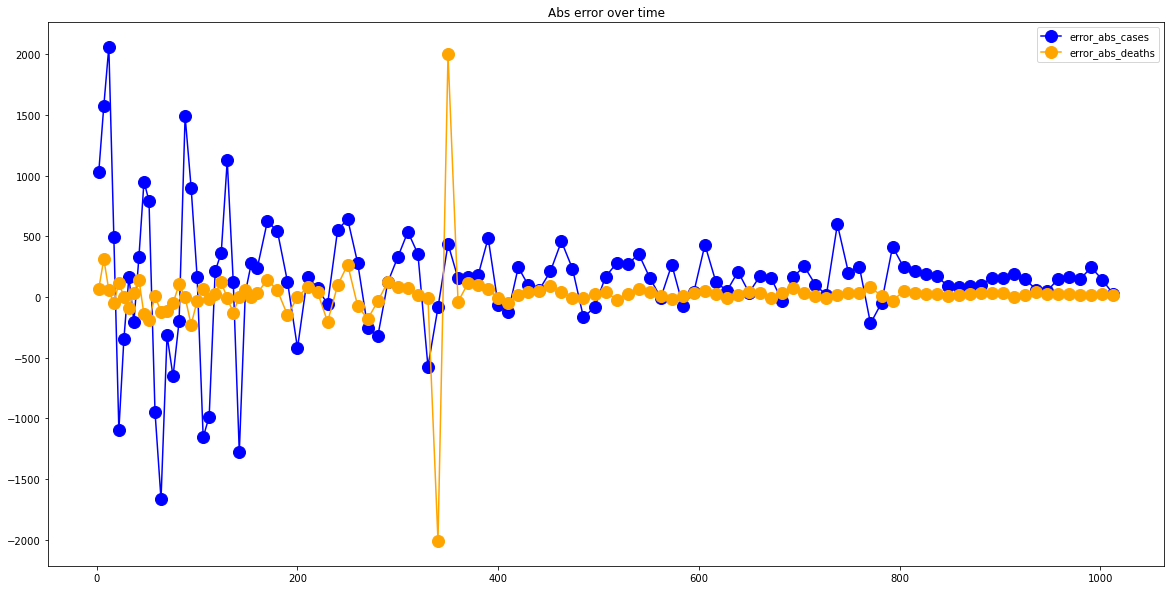

In [9]:
visShow("Italy")

-- Spain performances for cases --
MAE =  846.954128440367
RMSE =  1979.4709839113048
-- Spain performances for deaths --
MAE =  167.4862385321101
RMSE =  388.7834943829112


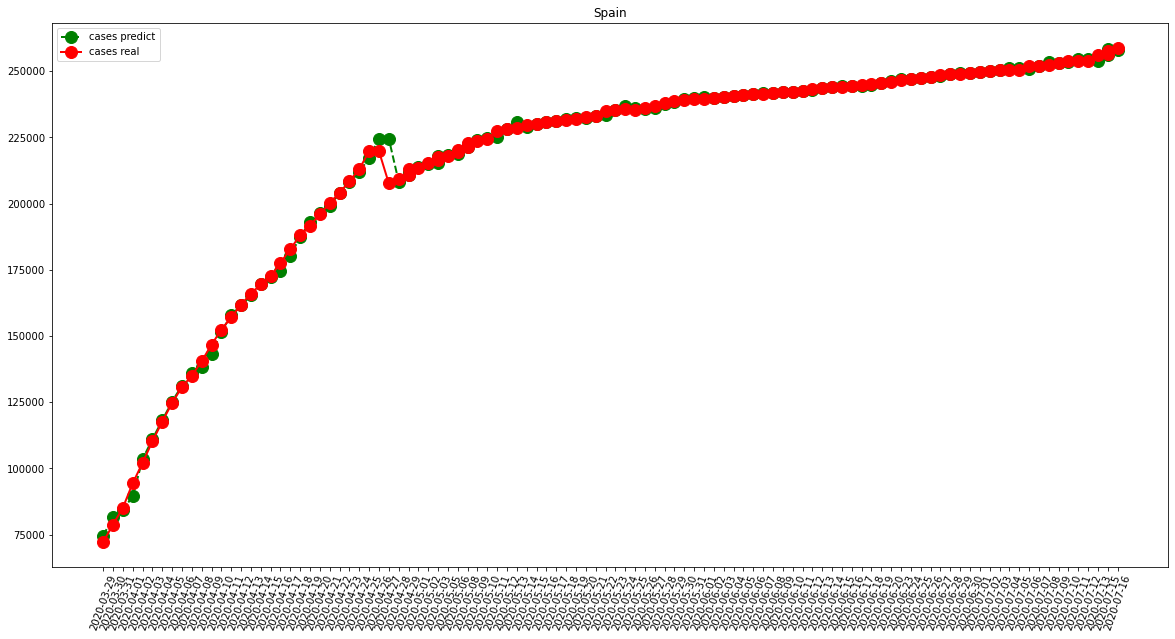

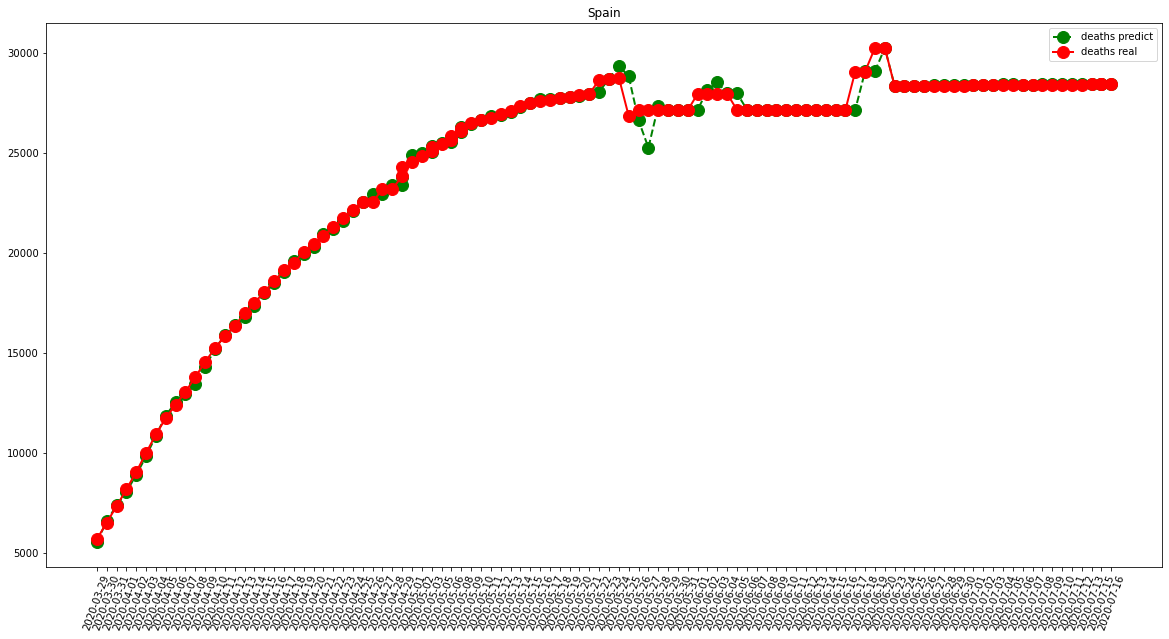

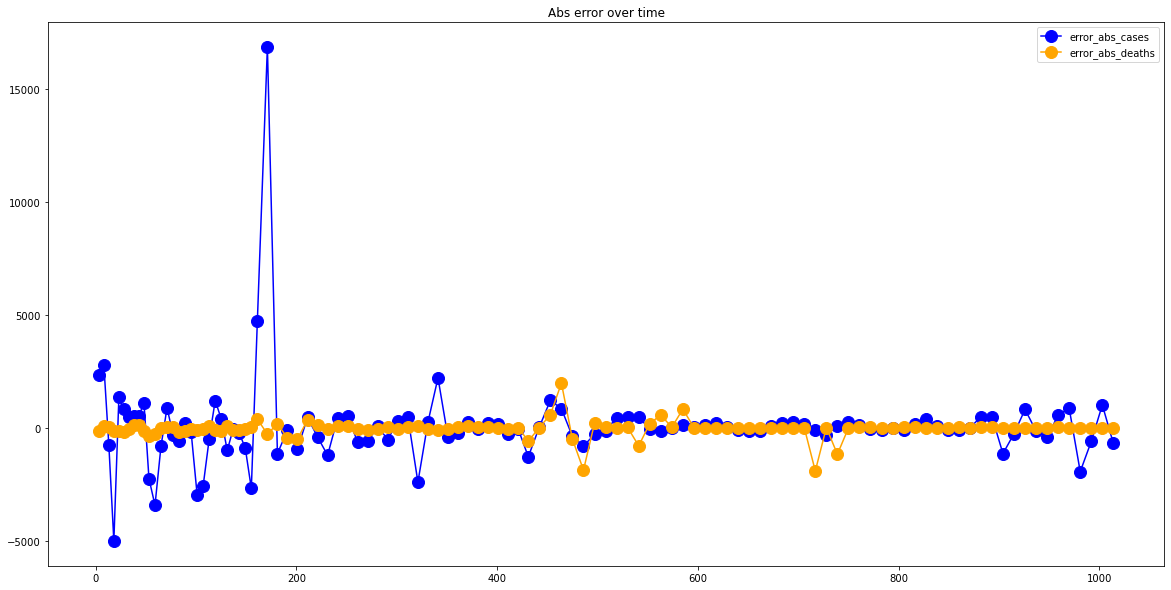

In [10]:
visShow("Spain")

-- United States performances for cases --
MAE =  5455.220183486239
RMSE =  7418.663033312328
-- United States performances for deaths --
MAE =  517.302752293578
RMSE =  755.0352321811628


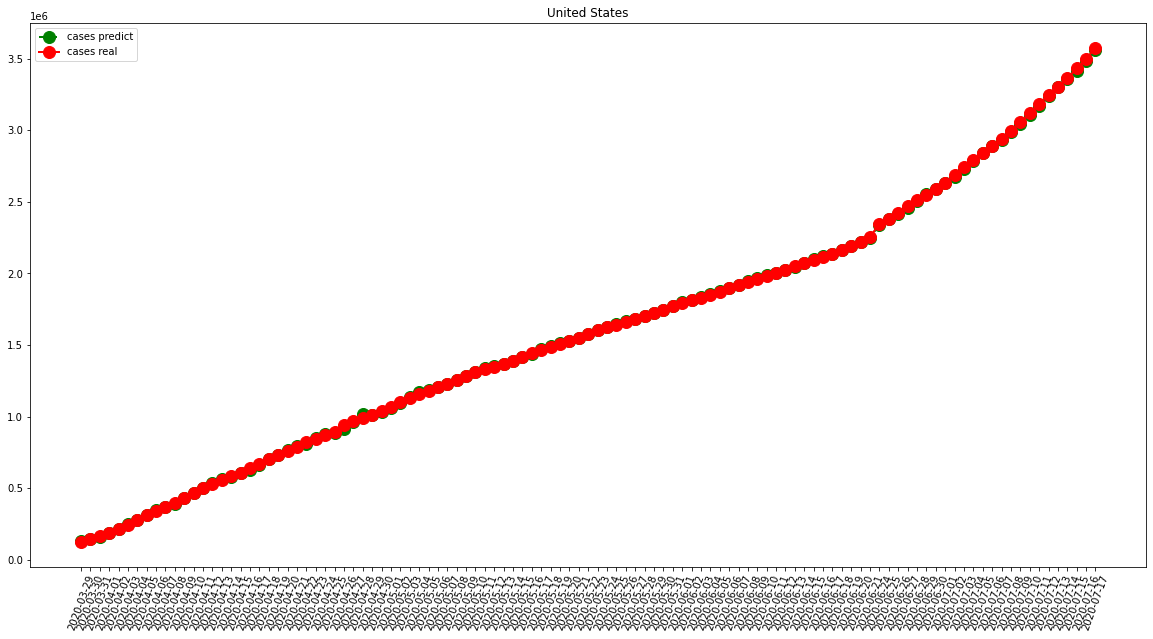

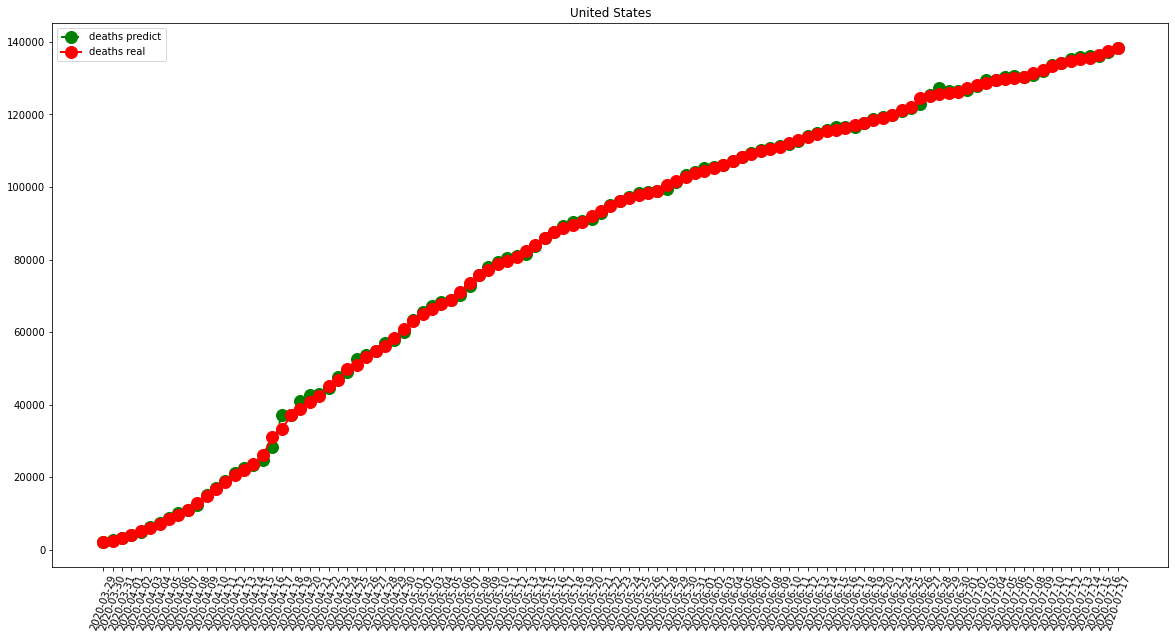

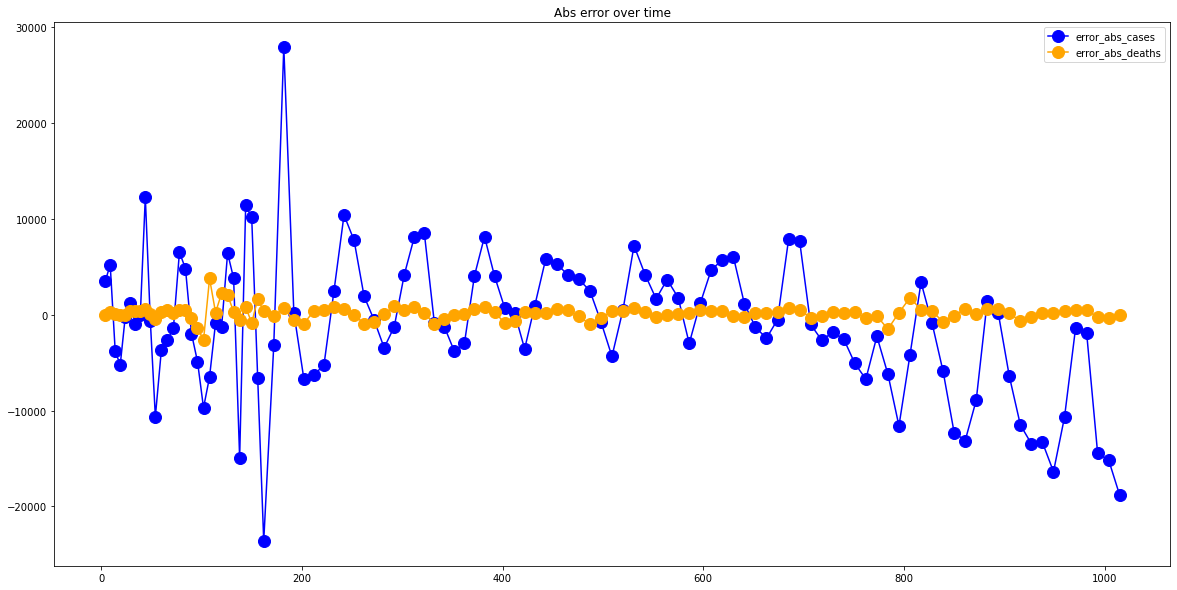

In [11]:
visShow("United States")

-- China performances for cases --
MAE =  83.72477064220183
RMSE =  113.14649106519818
-- China performances for deaths --
MAE =  35.972477064220186
RMSE =  150.3527656162013


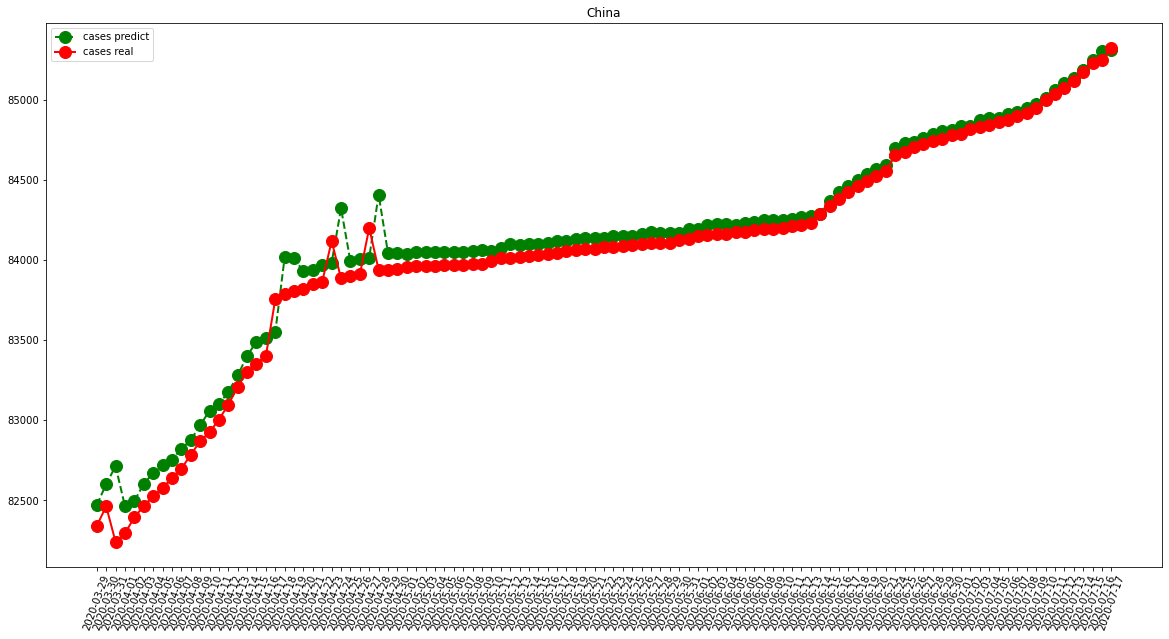

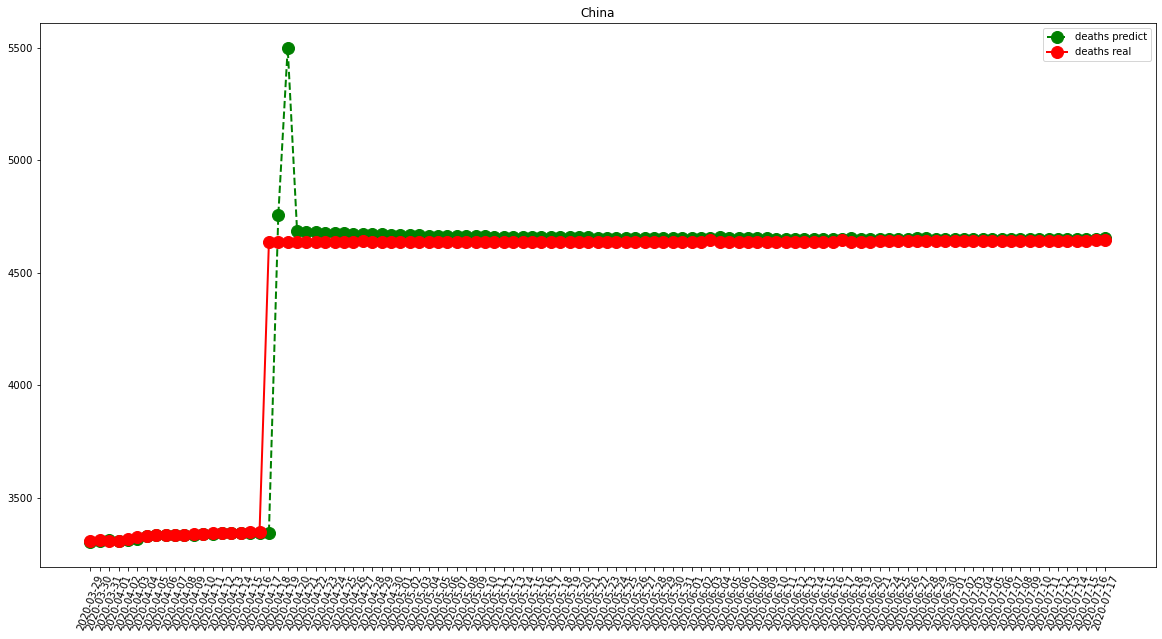

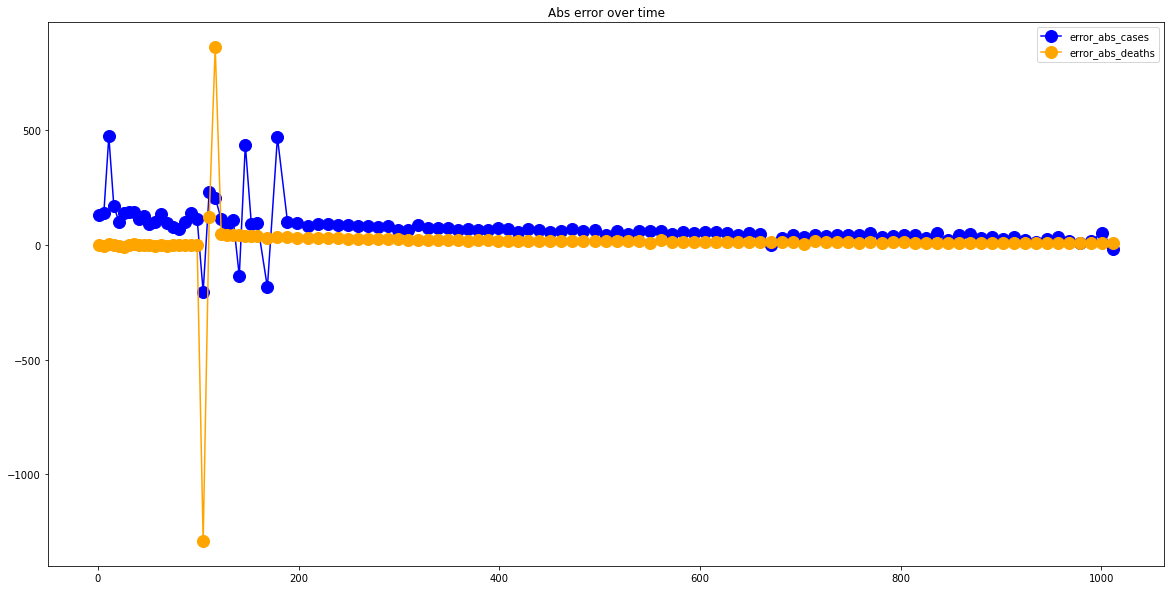

In [12]:
visShow("China")

-- United Kingdom performances for cases --
MAE =  1461.5925925925926
RMSE =  4635.325834565742
-- United Kingdom performances for deaths --
MAE =  225.53086419753086
RMSE =  544.352894797184


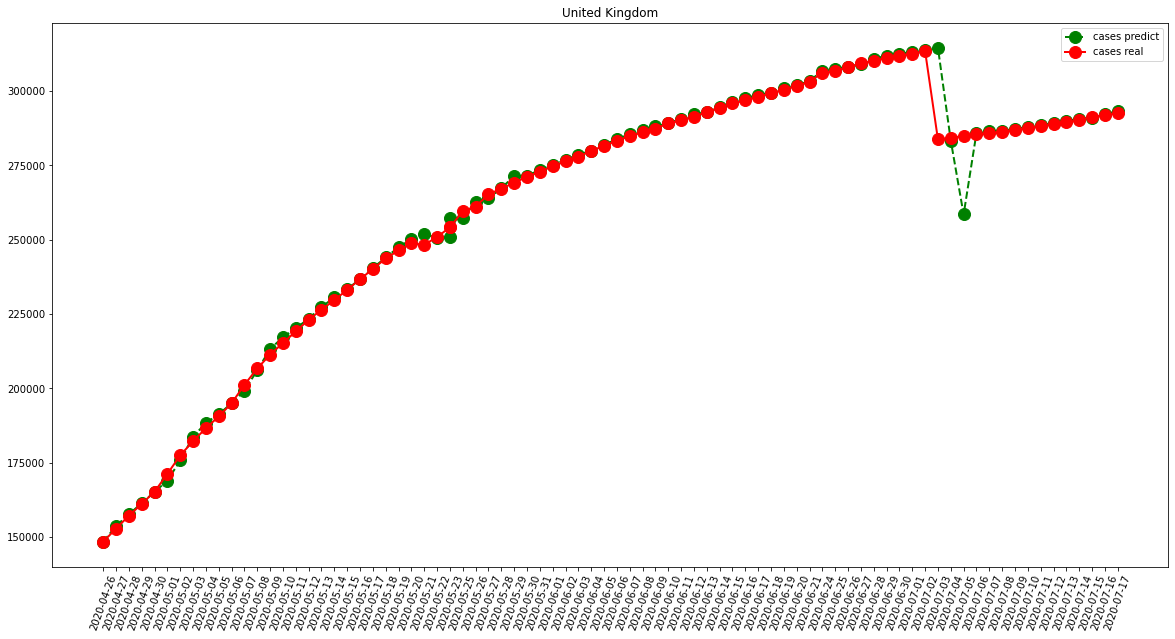

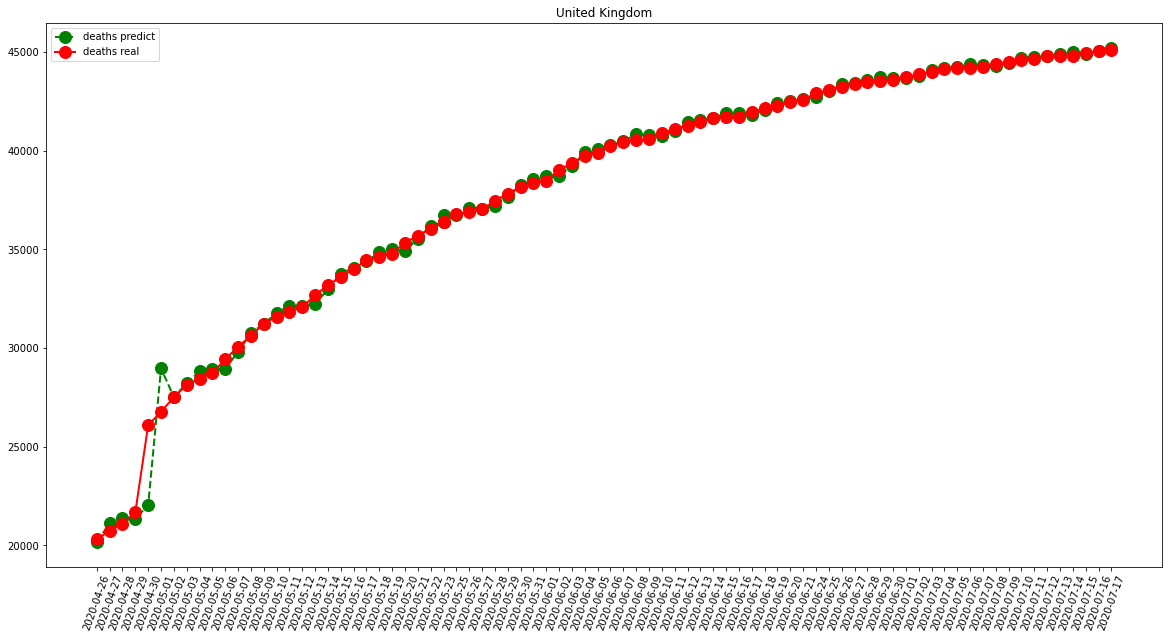

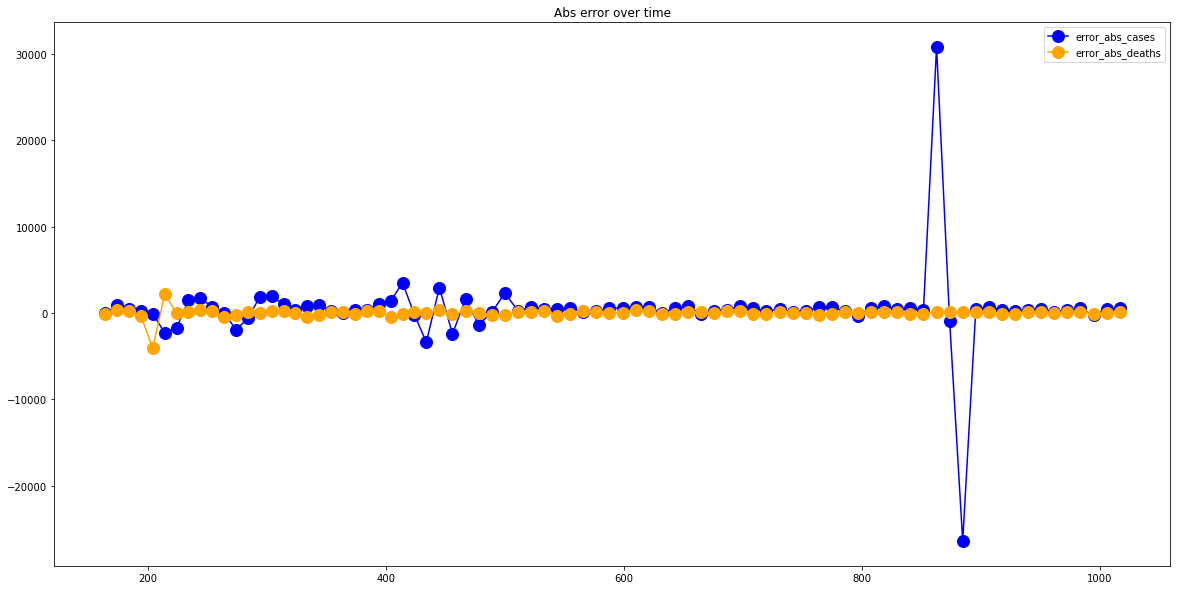

In [13]:
visShow("United Kingdom")

-- Germany performances for cases --
MAE =  300.1975308641975
RMSE =  422.1555502915665
-- Germany performances for deaths --
MAE =  28.54320987654321
RMSE =  48.43399479551373


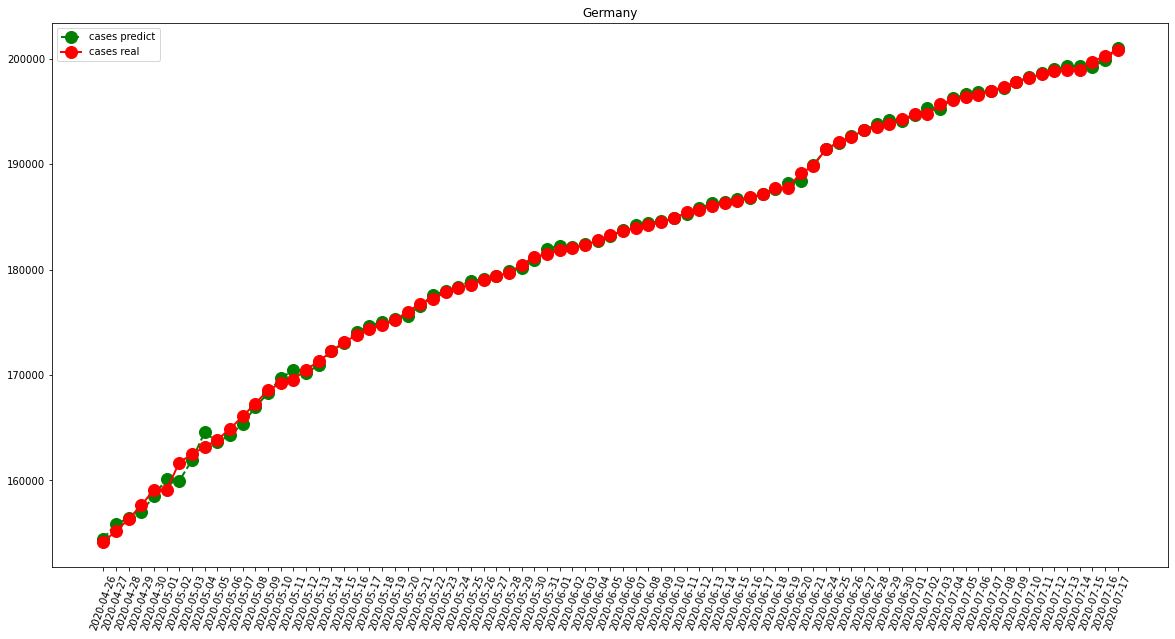

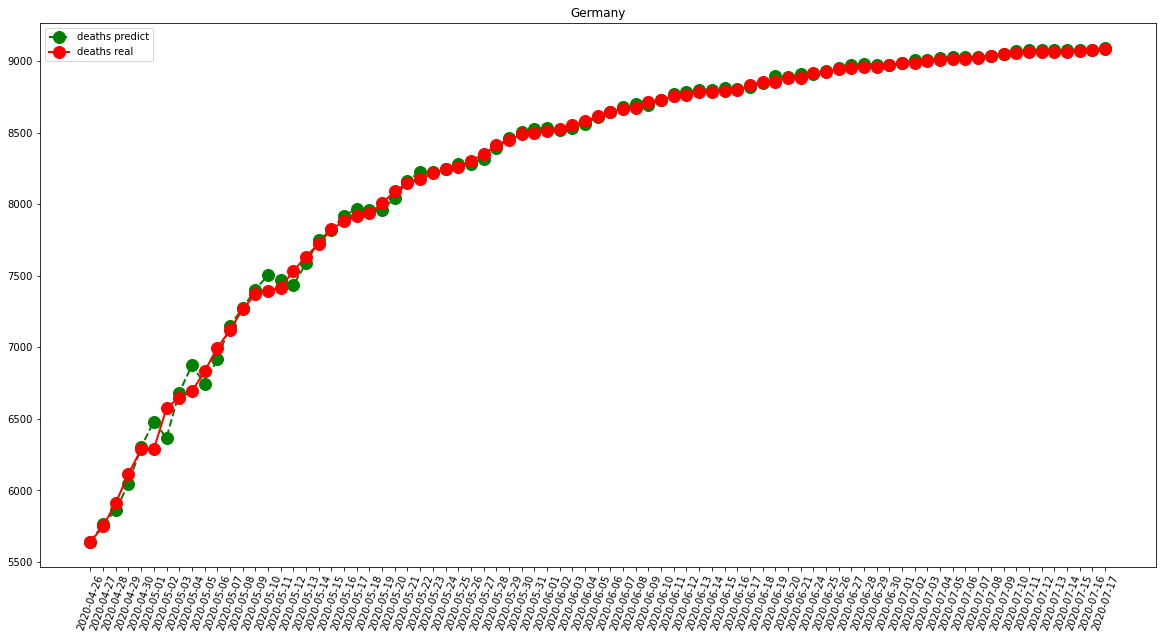

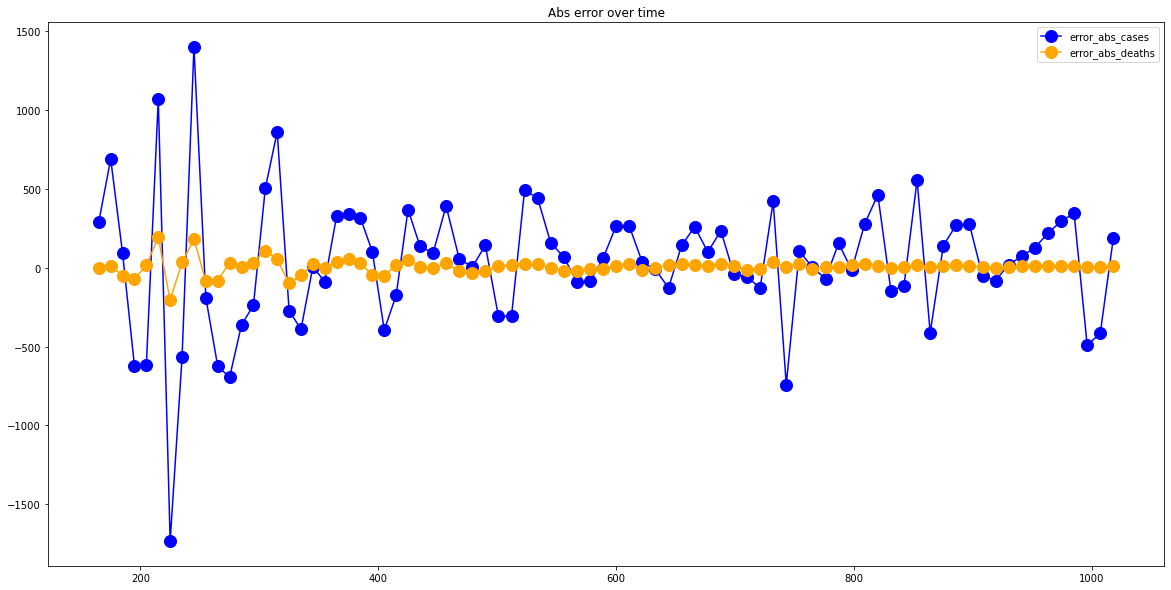

In [14]:
visShow("Germany")

-- Iran performances for cases --
MAE =  371.2716049382716
RMSE =  480.97132945019337
-- Iran performances for deaths --
MAE =  19.17283950617284
RMSE =  29.80574971460008


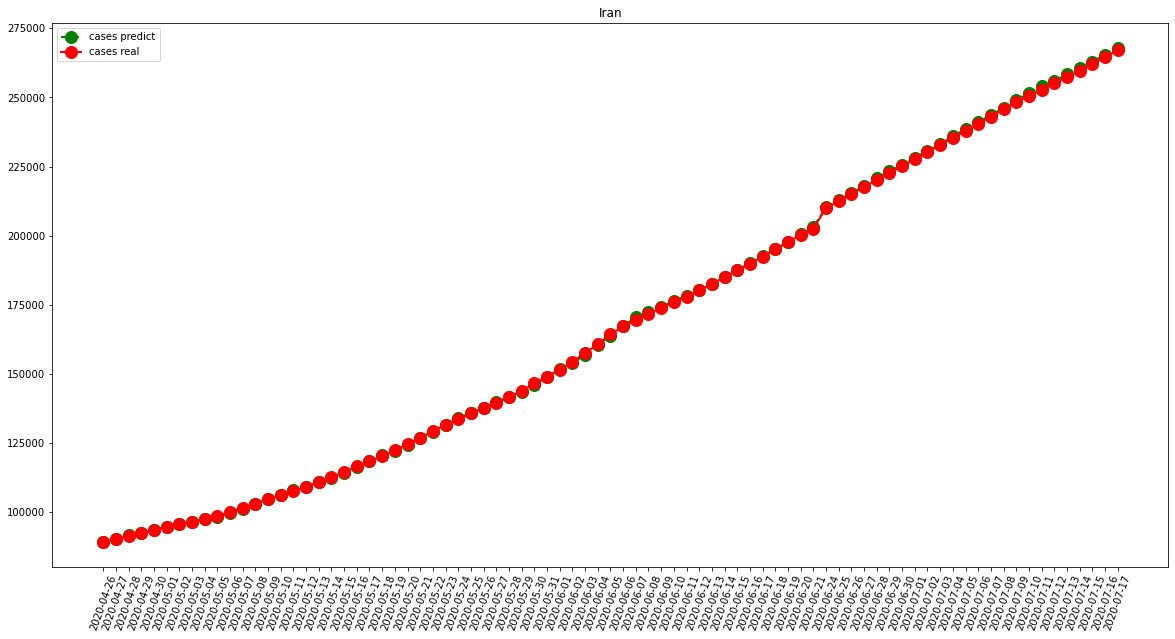

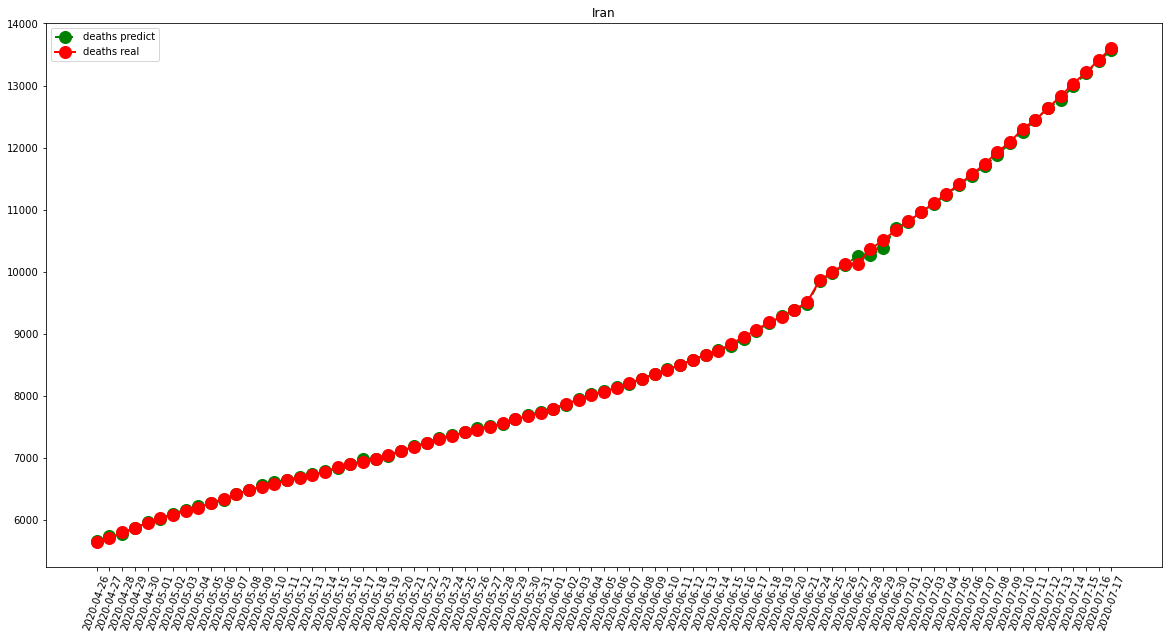

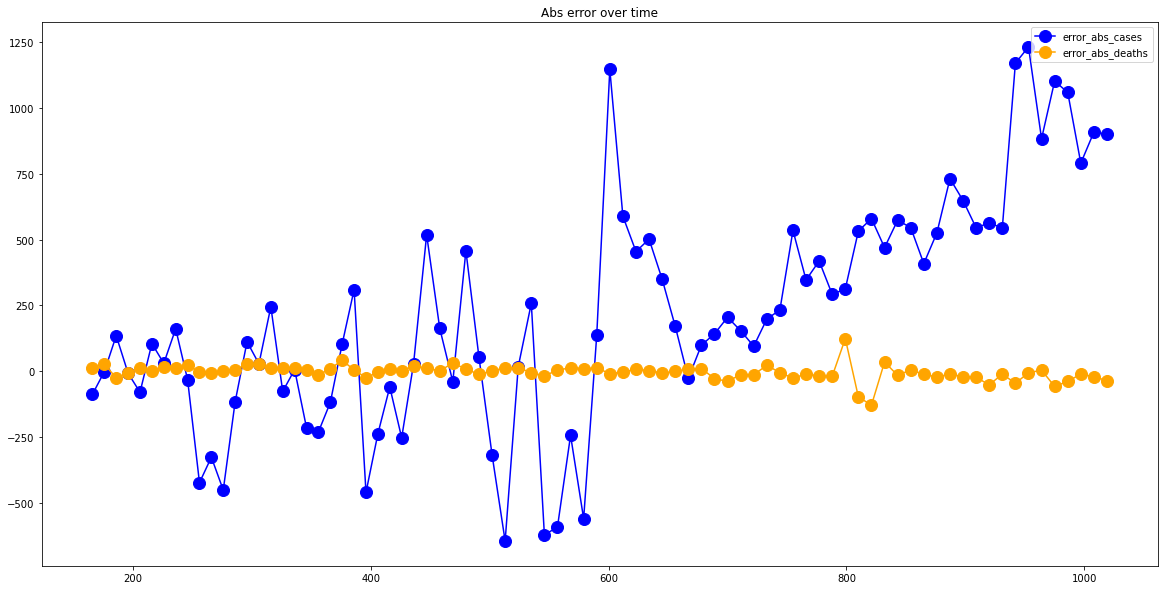

In [15]:
visShow("Iran")

-- Turkey performances for cases --
MAE =  233.11111111111111
RMSE =  381.6412897919643
-- Turkey performances for deaths --
MAE =  22.962962962962962
RMSE =  112.78440046236146


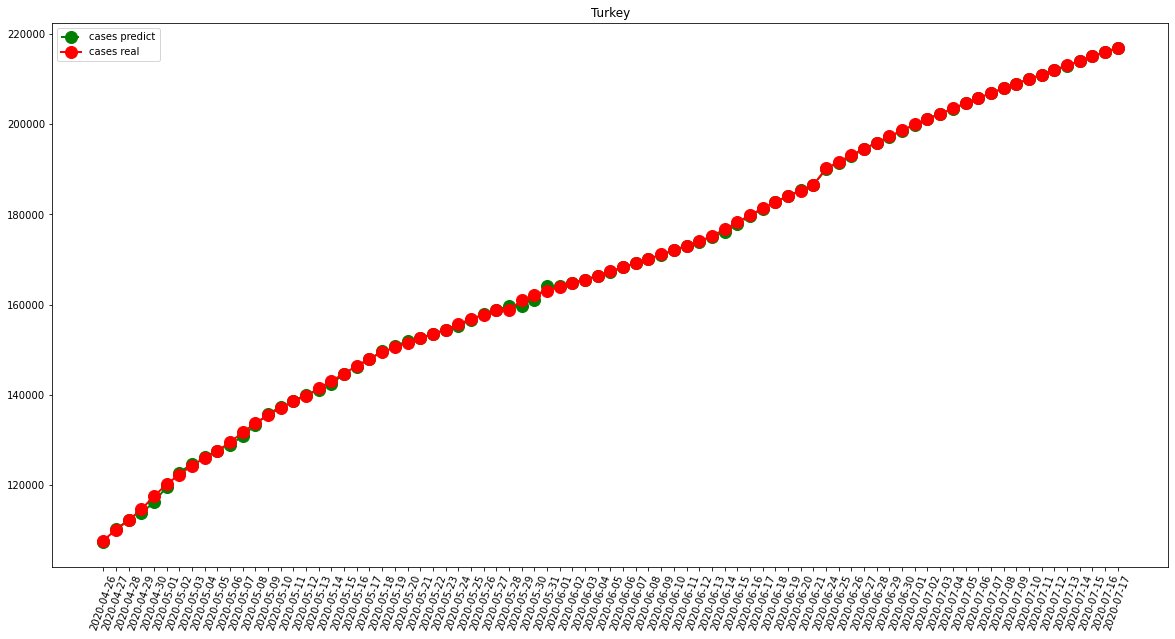

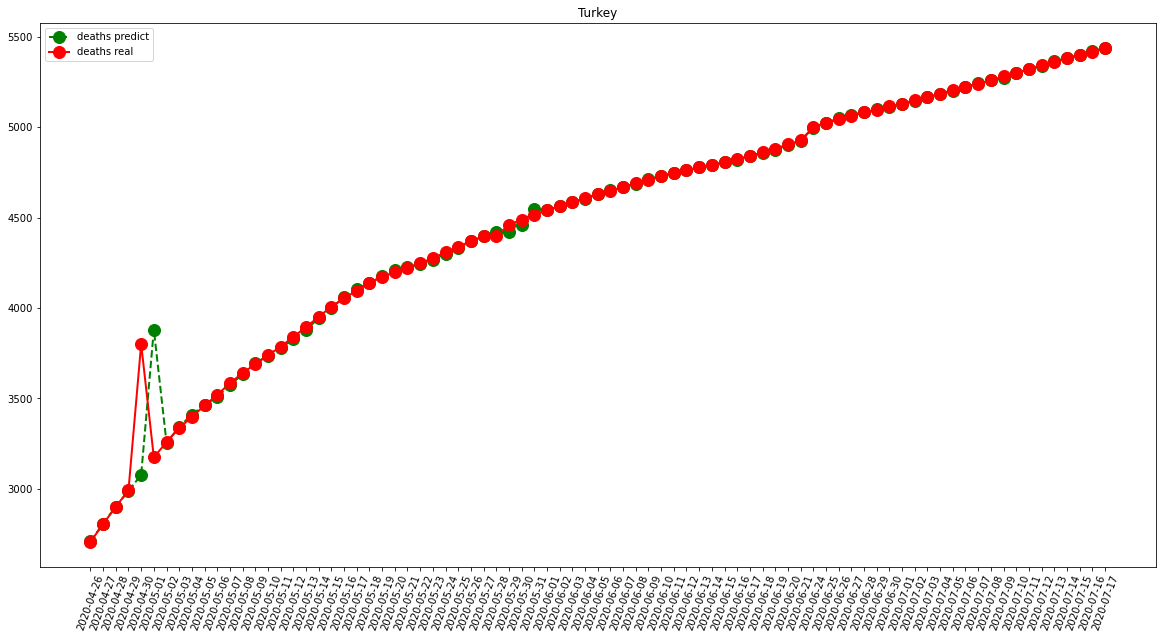

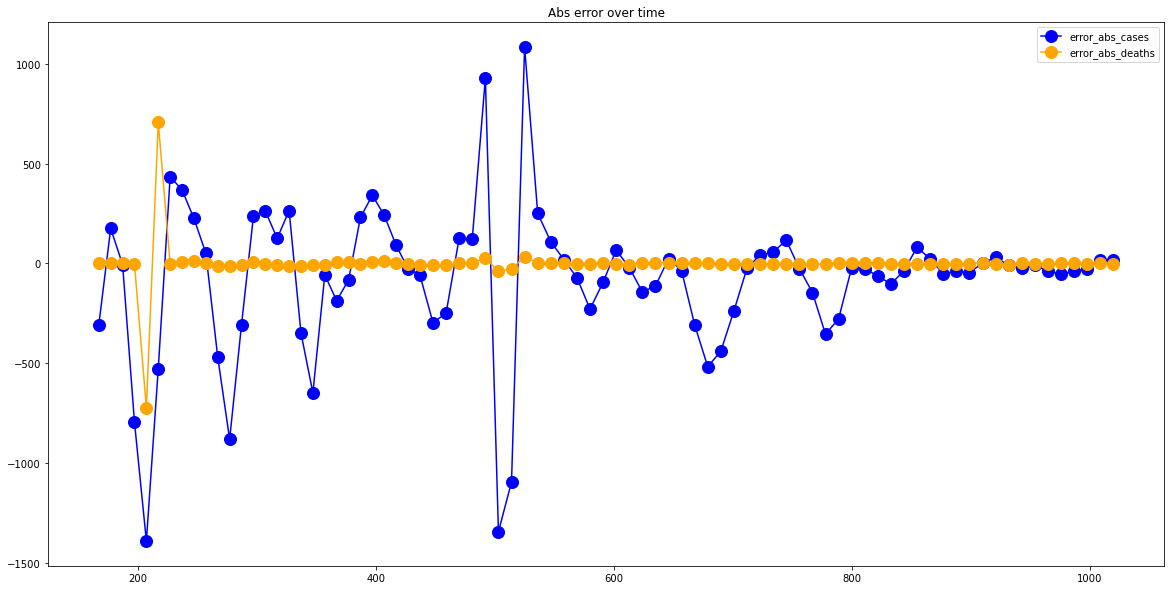

In [16]:
visShow("Turkey")

-- Brazil performances for cases --
MAE =  9530.685185185184
RMSE =  12636.616327312613
-- Brazil performances for deaths --
MAE =  366.51851851851853
RMSE =  456.10090663913076


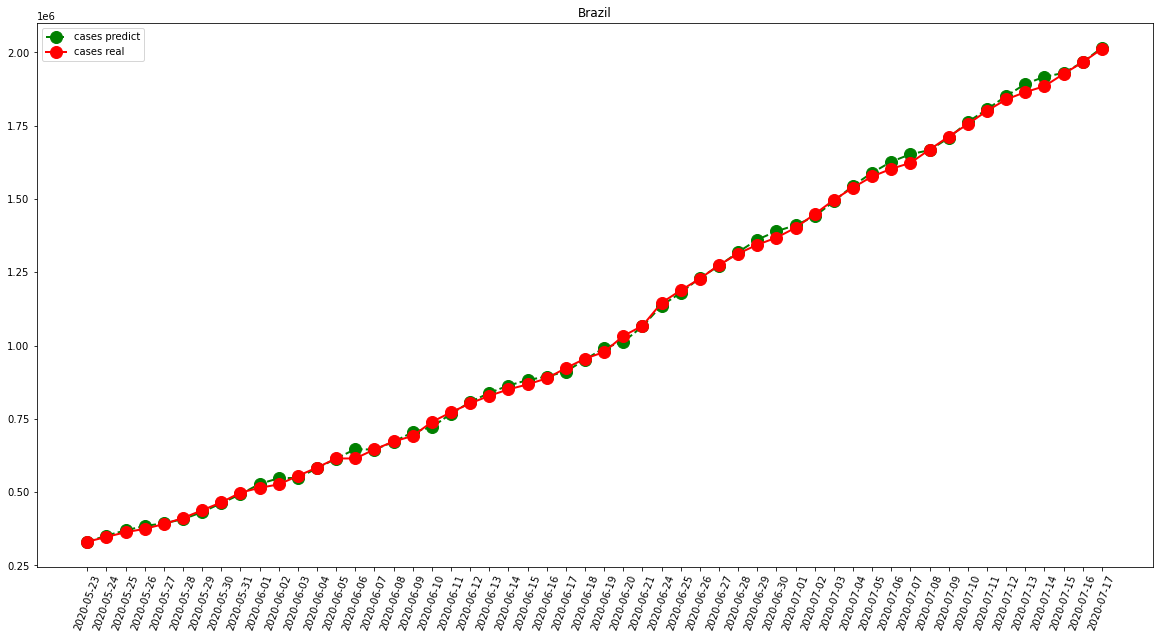

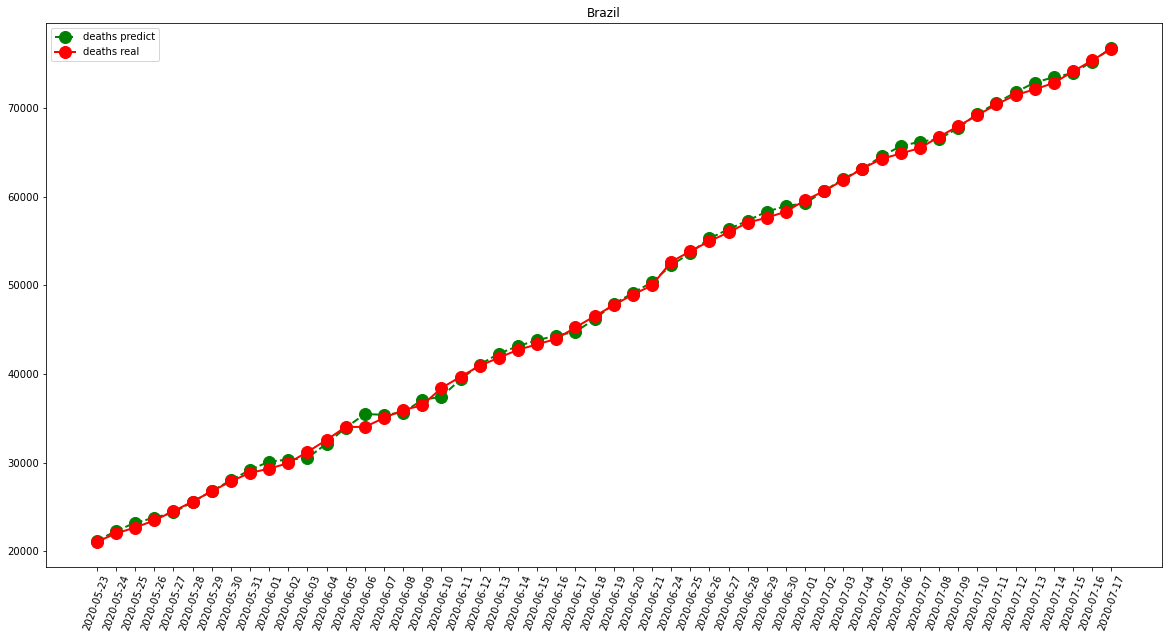

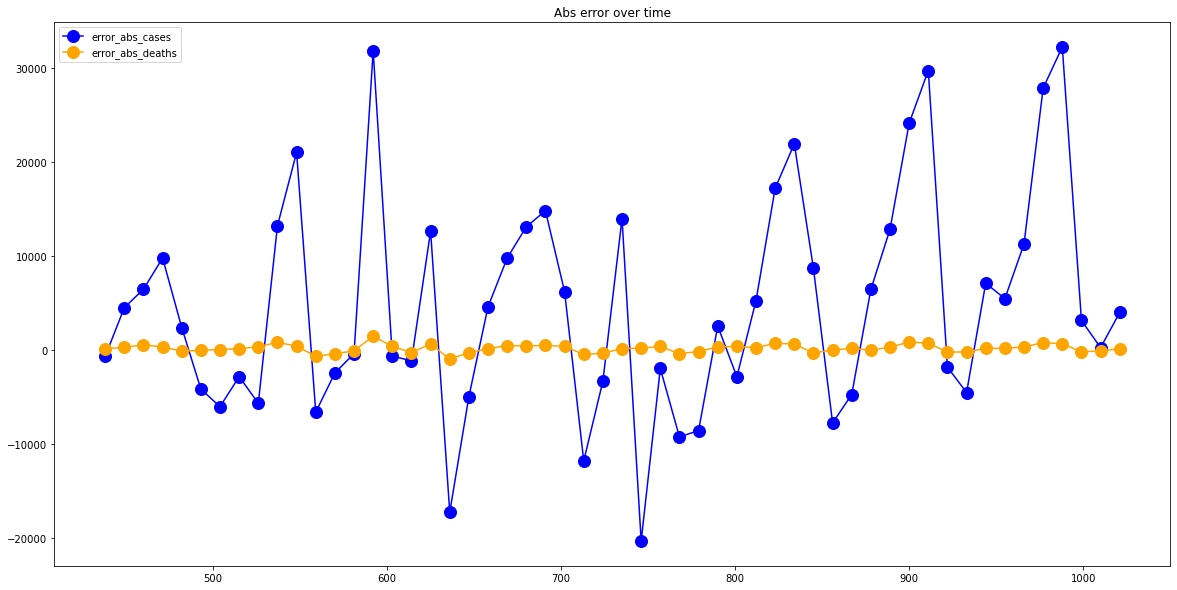

In [17]:
visShow("Brazil")

In [18]:
frame.to_csv(f"AzureSC\\Rapport\\Fullrap{date.today()}.csv")

The data's are sometimes corrected by the authorities, which causes deregulation of the curves and models (example China the 17-04, or France 05/06-04)